Learning Cross-Validation, Cross-validation is essentially to fully trust that your model perform better even on unseen datas, it creates a subset of the original training datas (folds) and trains each one and calculates the overall performance of your model. This way, your model is trained and tested on all your available data points.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

url = r'C:\Users\12368\OneDrive\Desktop\DataScience\melb_data.csv'
data = pd.read_csv(url)

y = data['Price']
features = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[features]

In [2]:
# create a method to test the model with different estimators
def get_model(n_estimators):
    pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])

    scores = -1 * cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
    return scores.mean() # returns mean scores of the model

In [3]:
results = {} # different estimator values are stored here
for i in range(1, 9):
    results[50*i] = get_model(50*i)

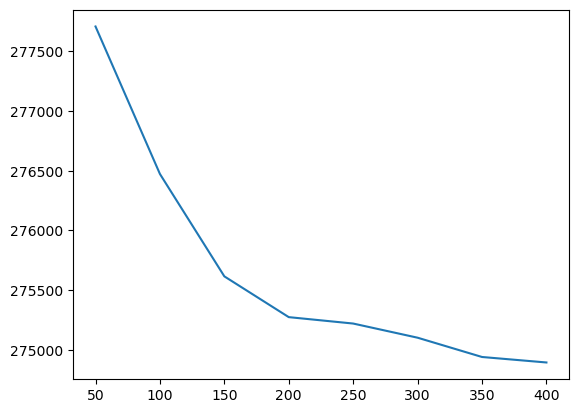

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("No. of estimators")
plt.ylabel("Mean Scores")
plt.show()